In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [2]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [3]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

In [4]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
    print('Team "{}", {} games, {} goals'.format(team['name'], len(fixtures), goals))
    team['games'] = fixtures
    team['goals'] = goals

Team "FC Rio Ave", 34 games, 9 goals
Team "FC Porto", 40 games, 23 goals
Team "Moreirense FC", 34 games, 6 goals
Team "FC Paços de Ferreira", 34 games, 9 goals
Team "Sporting CP", 40 games, 19 goals
Team "Maritimo Funchal", 34 games, 9 goals
Team "CD Tondela", 34 games, 10 goals
Team "SL Benfica", 40 games, 17 goals
Team "Boavista Porto FC", 34 games, 7 goals
Team "FC Arouca", 0 games, 0 goals
Team "Vitoria Setubal", 34 games, 7 goals
Team "C.F. Os Belenenses", 34 games, 10 goals
Team "Vitoria Guimaraes", 34 games, 7 goals
Team "Sporting Braga", 34 games, 15 goals
Team "GD Estoril Praia", 34 games, 8 goals
Team "Feirense", 34 games, 9 goals
Team "Nacional Funchal", 0 games, 0 goals
Team "G.D. Chaves", 34 games, 9 goals


In [5]:
team_for_pd = []
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    if team['games']:
        team_for_pd.append({'name': team['name'], 'games': len(fixtures), 'goals': team['goals']})
team_for_pd

[{'games': 34, 'goals': 9, 'name': 'FC Rio Ave'},
 {'games': 40, 'goals': 23, 'name': 'FC Porto'},
 {'games': 34, 'goals': 6, 'name': 'Moreirense FC'},
 {'games': 34, 'goals': 9, 'name': 'FC Paços de Ferreira'},
 {'games': 40, 'goals': 19, 'name': 'Sporting CP'},
 {'games': 34, 'goals': 9, 'name': 'Maritimo Funchal'},
 {'games': 34, 'goals': 10, 'name': 'CD Tondela'},
 {'games': 40, 'goals': 17, 'name': 'SL Benfica'},
 {'games': 34, 'goals': 7, 'name': 'Boavista Porto FC'},
 {'games': 34, 'goals': 7, 'name': 'Vitoria Setubal'},
 {'games': 34, 'goals': 10, 'name': 'C.F. Os Belenenses'},
 {'games': 34, 'goals': 7, 'name': 'Vitoria Guimaraes'},
 {'games': 34, 'goals': 15, 'name': 'Sporting Braga'},
 {'games': 34, 'goals': 8, 'name': 'GD Estoril Praia'},
 {'games': 34, 'goals': 9, 'name': 'Feirense'},
 {'games': 34, 'goals': 9, 'name': 'G.D. Chaves'}]

In [7]:
teams_pd = pd.DataFrame(team_for_pd)
del teams_pd['name']
teams_pd

,games,goals
0,34,9
1,40,23
2,34,6
3,34,9
4,40,19
5,34,9
6,34,10
7,40,17
8,34,7
9,34,7


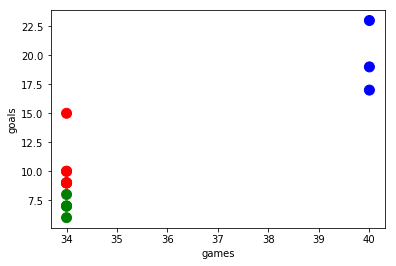

In [9]:
whitened = whiten(teams_pd.as_matrix())
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='games', y='goals', c=colors, s=100)

C:\Users\Maxim\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


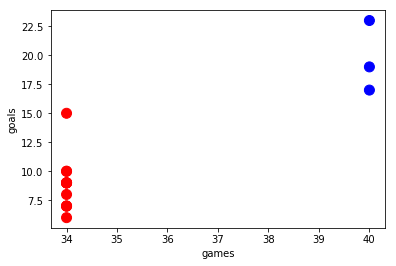

In [12]:
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='games', y='goals', c=colors, s=100)